In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('rfm_data_customer.csv',index_col=0)
df.drop('most_recent_visit',axis=1,inplace=True)

In [37]:
df

,revenue,number_of_orders,recency_days
customer_id,,,
22086,777,9,232
2290,1555,16,115
26377,336,5,43
24650,1189,12,64
12883,1229,12,23
...,...,...,...
3249,998,10,31
6686,771,8,187
16418,1016,9,154


In [38]:
scaler=StandardScaler()
dfscaled=scaler.fit_transform(df)

In [39]:
km=KMeans(n_clusters=2,random_state=23)
km.fit(dfscaled)

KMeans(n_clusters=2, random_state=23)

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
km=KMeans(n_clusters=2,random_state=23)
pipe=Pipeline([('SCL',scaler),('CLUST',km)])
dfscaled=scaler.fit_transform(df)
pipe.fit(dfscaled)
print(km.labels_)
print(silhouette_score(dfscaled,km.labels_))

[1 0 1 ... 1 1 0]
0.3618931621400925


In [27]:
clust=[2,3,4,5,6]
scores=[]
for i in clust:
    km=KMeans(n_clusters=i,random_state=23)
    km.fit(dfscaled)
    sil=silhouette_score(dfscaled,km.labels_)
    scores.append(sil)

print("Best Clusters=",clust[np.argmax(scores)])
print("Best Score=",np.max(scores))
                             
# plt.scatter(clust,scores,c='red')
# plt.plot(clust,scores,c="blue")
# plt.xlabel("No. of Clusters")
# plt.ylabel("Score")
# plt.show()

Best Clusters= 3
Best Score= 0.37051315285758896


In [43]:
km=KMeans(n_clusters=3,random_state=23)
km.fit(dfscaled)
sil=silhouette_score(dfscaled,km.labels_)

In [45]:
clust_df=df.copy()
clust_df['Cluster']=km.labels_
clust_df.sort_values(by='Cluster')

,revenue,number_of_orders,recency_days,Cluster
customer_id,,,,
22086,777,9,232,0
14026,790,9,190,0
8174,723,8,197,0
19986,819,8,138,0
38942,711,9,62,0
...,...,...,...,...
33907,766,8,488,2
39831,792,6,338,2
22599,515,7,543,2


[0.67539375 0.27751561 0.04709064]


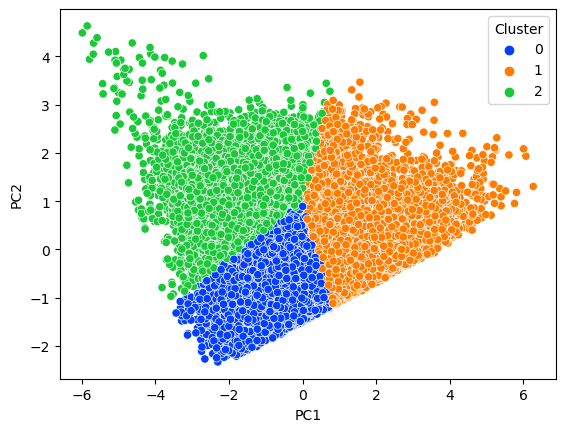

             revenue  number_of_orders  recency_days
Cluster                                             
0         752.852220           8.26094    135.625309
1        1284.977856          12.94206    133.268102
2         691.445543           7.34382    415.194607


In [46]:
############ PCA ###########
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

prcomp=PCA()
scores=prcomp.fit_transform(dfscaled)
print(prcomp.explained_variance_ratio_)
df_PCs=pd.DataFrame({'PC1':scores[:,0],'PC2':scores[:,1],'Cluster':km.labels_})
df_PCs['Cluster']=df_PCs['Cluster'].astype(object)

sns.scatterplot(data=df_PCs,x='PC1',y='PC2',palette='bright',hue='Cluster')
plt.show()

print(clust_df.groupby(by='Cluster').mean())